https://github.com/Karsten-Yan/pyberlin-ky

# Setup

In [7]:
#packages for data handling and plotting

# to install scikitplot with anaconda run:
# conda install -c conda-forge scikit-plot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.image as mpimg
from IPython.display import display
import scikitplot as skplt

sns.set(style="white", palette="pastel",font_scale=1.5, rc={"lines.linewidth": 2.5,'figure.figsize':(11.7,8.27)})
pd.options.display.max_columns = None

In [8]:
# some general parameters for plots
mpl.rcParams['axes.linewidth'] = 2.5
mpl.rcParams['axes.edgecolor'] = "grey"
mpl.rcParams['figure.edgecolor'] = "grey"
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['legend.edgecolor'] = "grey"
mpl.rcParams['legend.shadow'] = False
mpl.rcParams["legend.framealpha"] = 1
mpl.rcParams['font.weight'] = "bold"
mpl.rcParams['axes.labelweight'] = "bold"
mpl.rcParams['axes.titleweight'] = "bold"

In [9]:
#modelling packages from sklearn

# to install xgboost with anaconda run:
# conda install -c anaconda py-xgboost

from sklearn.model_selection import cross_validate

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import f1_score

# Load Data

In [10]:
# load in the dataframe with pandas, change some data types for correct handling later

df_combined = pd.read_csv("data/exported/df_pyberlin_demo.csv", index_col = 0)
df_combined = df_combined.astype({"base_1":"category","base_2":"category","base_3":"category",\
                                          "base_4":"category","base_5":"category","modified_status":"category"})
df_combined = df_combined.astype({"ref_number":"object"})

In [11]:
df_combined.head()

,modified_status,ref_number,dwell_time_median,dwell_time_min,dwell_time_max,dwell_time_rolling_median,dwell_time_rolling_min,dwell_time_diff_to_median,median_value_median,median_value_min,median_value_max,median_value_rolling_median,median_value_rolling_min,median_value_diff_to_median,base_1,base_2,base_3,base_4,base_5,file_name,file_type
0,1.0,ref_0000,0.049906,0.005113,0.094814,0.023089,0.022861,0.039380,102.017702,87.318945,108.891074,102.017702,100.448388,7.926536,A,A,T,G,G,modified_rep_1.tsv,modified
1,0.0,ref_0000,0.023089,0.008614,0.063580,0.022975,0.006346,0.012563,100.448388,80.185500,119.615164,108.564081,100.448388,6.357222,A,T,G,G,G,modified_rep_1.tsv,modified
2,0.0,ref_0000,0.022861,0.002792,0.089663,0.022861,0.006346,0.012336,118.765173,102.514759,126.849837,112.652922,100.448388,24.674007,T,G,G,G,C,modified_rep_1.tsv,modified
3,0.0,ref_0000,0.006346,0.001938,0.049635,0.014807,0.006346,-0.004180,115.110460,97.295992,131.978892,112.652922,76.719371,21.019294,G,G,G,C,T,modified_rep_1.tsv,modified
4,0.0,ref_0000,0.014807,0.002748,0.075328,0.008563,0.006346,0.004281,112.652922,102.709198,120.275825,112.652922,76.719371,18.561756,G,G,C,T,T,modified_rep_1.tsv,modified


# Exploratory Data Analysis

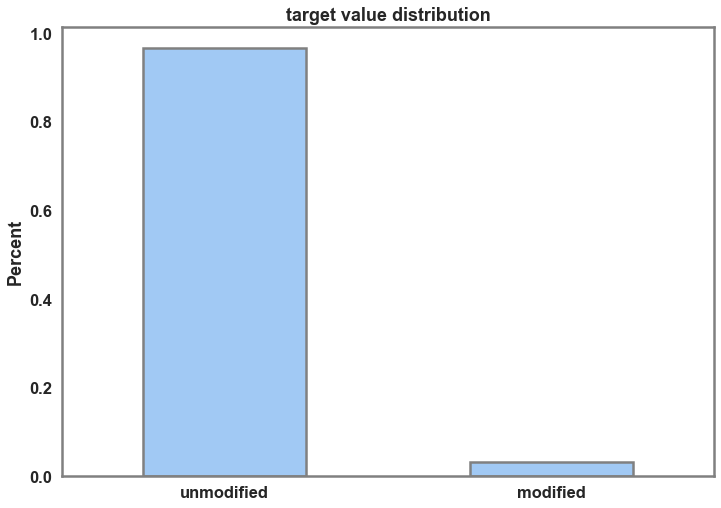

In [12]:
# simple bargraph comparing normalize target value distribution

ax = df_combined.modified_status.value_counts(normalize=True).plot.bar(edgecolor = "grey", linewidth = 2.5)
ax.set(ylabel = "Percent", xticklabels=["unmodified", "modified"])
plt.xticks(rotation="horizontal")
plt.title("target value distribution");

## Interactive Plot

In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [14]:
df_dnaviewer = df_combined[["ref_number","file_name","base_3","dwell_time_median","dwell_time_rolling_min",
                            "dwell_time_diff_to_median","modified_status","file_type"]]

In [15]:
def getIndexes(dfObj, value):
    # helper functions to get indices with specific values from a dataframe
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    if seriesObj.any():
        columnNames = list(seriesObj[seriesObj == True].index)
        # Iterate over list of columns and fetch the rows indexes where value exists
        for col in columnNames:
            rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row))
        # Return a list of tuples indicating the positions of value in the dataframe
    else:
        listOfPos = False
    return listOfPos

In [16]:
def plot_dna(i, col, axs, ref, startpos, stoppos, df_temp):
    #function for plotting one side of the plot
    start,stop = 0,15
    font =  {'size': 24, 
             'weight':'bold'}
    
    
    sequence = "".join(df_temp.base_3.values)
    
    modified_positions = getIndexes(df_temp[["base_3","modified_status"]], 1.0)
    
    if modified_positions:
            for elm in modified_positions:

                axs[0,col].axvspan(elm-0.5, elm+0.5, color='red', alpha=0.2,zorder=0)
                axs[1,col].axvspan(elm-0.5, elm+0.5, color='red', alpha=0.2,zorder=1)
                axs[2,col].axvspan(elm-0.5, elm+0.5, color='red', alpha=0.2,zorder=1)
                axs[3,col].axvspan(elm-0.5, elm+0.5, color='red', alpha=0.2,zorder=1)


            
    box1 = patches.Rectangle (xy=(4.5,1), width = 5, height = 2, edgecolor="grey",
                             linewidth=2.5, facecolor = "#FFB482")
    box2 = patches.FancyBboxPatch (xy=(6,5), width = 2, height = 2, edgecolor="grey",
                             linewidth=2.5, facecolor = "#A1C9F4", boxstyle = "Round4")
    
    axs[0,col].add_patch(box1)
    axs[0,col].add_patch(box2)
    axs[0,col].set_ylim(0,10)
    axs[0,col].text(7,2,s="reading frame", ha="center", va="center")
    axs[0,col].text(7,6,s="center", ha="center", va="center")
    axs[0,col].text(-0.3,2, va="center", ha="center", s="3'")
    axs[0,col].text(14.3,2, va="center", ha="center", s="5'")
    temp_title = df_temp.file_type[0]
    axs[0,col].text(7,9,s=temp_title, ha="center", va="center")
    axs[0,col].plot(np.arange(start,stop),np.full(stop,2), color="grey", zorder=0)
    axs[0,col].plot([4.5,6.5],[3,5],color = "grey", zorder=0)
    axs[0,col].plot([7.5,9.5],[5,3], color="grey", zorder=0)
    axs[0,col].axis("off")
    axs[0,col].set_yticklabels([""])
    
    bl = "#A1C9F4"
    gr = "#8DE5A1"
    og = "#FFB482"
    
    bar_colors = [gr,gr,gr,gr,gr,og,og,bl,og,og,gr,gr,gr,gr,gr,]
    
    axs[1,col].bar(x=range(0,stop-start),height=df_temp.dwell_time_diff_to_median, linewidth=2.5,
            edgecolor="grey",zorder=2, color = bar_colors)
    axs[1,col].set_ylabel("Dwell Time\nDiff to Median")
    axs[1,col].set_ylim(0,0.1)
    axs[1,col].set_yticklabels([""])
    
    axs[2,col].bar(x=range(0,stop-start),height=df_temp.dwell_time_rolling_min, linewidth=2.5,
            edgecolor="grey",zorder=2, color = bar_colors)
    axs[2,col].set_ylabel("Dwell Time\nRolling Minimum")
    axs[2,col].set_ylim(0,0.03)
    axs[2,col].set_yticklabels([""])
    
    axs[3,col].bar(x=range(0,stop-start),height=df_temp.dwell_time_median, linewidth=2.5, 
            edgecolor="grey",zorder=2, color = bar_colors)
    axs[3,col].set_ylabel("Dwell Time\nMedian")
    axs[3,col].set_ylim(0,0.1)
    axs[3,col].set_yticklabels([""])
    axs[3,col].set_xticks(np.arange(start,stop))
    axs[3,col].set_xticklabels(list(sequence), fontdict=font )
    axs[3,col].set_xlim(-0.5,14.5)
    
    if df_temp.base_3.iloc[7] == "A":
        img=mpimg.imread('base_img/adenosin.png')
    elif df_temp.base_3.iloc[7] == "C":
        img=mpimg.imread('base_img/cytidin.png')
    elif df_temp.base_3.iloc[7] == "G":
        img=mpimg.imread('base_img/guanosin.png')
    elif df_temp.base_3.iloc[7] == "T":
        img=mpimg.imread('base_img/uridin.png')
    axs[1,2].imshow(img)
    axs[1,2].set_xlim(-100,1200)
    axs[1,2].set_ylim(1100,-100)
    axs[1,2].set_yticklabels([""])
    axs[1,2].set_xticklabels([""])
    axs[1,2].axis("off")
    
    if modified_positions:
            for elm in modified_positions:
                if elm == 7:
                    img2=mpimg.imread('base_img/1m7.png')
                    axs[2,2].imshow(img2)
    axs[2,2].set_xlim(-100,1400)
    axs[2,2].set_ylim(1100,-100)
    axs[2,2].set_yticklabels([""])
    axs[2,2].set_xticklabels([""])
    axs[2,2].axis("off")

In [17]:
def sequencing_show(i,ref):
    
    # function for putting both sides together and adding the graphical base representations
    
    start_i = i
    stop_i =i+15
    
    df_temp_mod = df_dnaviewer[(df_dnaviewer["file_name"]=="modified_rep_1.tsv") &
                (df_dnaviewer["ref_number"]=="ref_000"+ref)][start_i:stop_i].reset_index()
    df_temp_unmod = df_dnaviewer[(df_dnaviewer["file_name"]=="unmodified_rep_1.tsv") &
                (df_dnaviewer["ref_number"]=="ref_000"+ref)][start_i:stop_i].reset_index()
    
    fig, axs = plt.subplots(
        4, 3,   figsize=(20, 10), 
        sharex='col', 
        gridspec_kw={"width_ratios": [2,2,1]}
    )
    
   
    plot_dna(i,0,axs,ref, start_i, stop_i, df_temp_mod)
    plot_dna(i,1,axs,ref, start_i, stop_i, df_temp_unmod)
    
    
    #plt.figure(edgecolor = "grey")
    plt.suptitle("DNA-Nanoporesequencing readout",weight="bold")
    #plt.tight_layout()
    plt.subplots_adjust(top=0.95,hspace = 0)
    axs[1,1].set_ylabel("")
    axs[2,1].set_ylabel("")
    axs[3,1].set_ylabel("")
    
    axs[0,2].set_visible(False)
    axs[3,2].bar(x = (400,900), 
                 height= (df_temp_mod.dwell_time_median.iloc[7],df_temp_unmod.dwell_time_median.iloc[7]),
                 edgecolor="grey",
                 linewidth=2.5,
                 width=400)
    #axs[3,2].set_xlim(-0.5,1.5)
    axs[3,2].set_xticks([400,900])
    axs[3,2].set_xticklabels(["Mod","Unmod"] )
    axs[3,2].set_ylim(0,0.1)
    axs[3,2].set_yticklabels([""])
    axs[3,2].set_ylabel("Dwell Time\nMedian")

In [18]:
# preparing interactive widgets and graphical output

play = widgets.Play(
    value=0,
    min=0,
    max=181,
    step=1,
    interval=2500,
    description="Press play",
    disabled=False)
text = widgets.IntText()
toggle = widgets.ToggleButtons(options=["0","1","2","3","4"])

playbox = widgets.HBox([play, text])

widgets.jslink((play, 'value'), (text, 'value'))
    
out = widgets.interactive_output(sequencing_show, {"i":play, "ref":toggle})
display(playbox,toggle,out)


ToggleButtons(options=('0', '1', '2', '3', '4'), value='0')

Output()

# Creating a Classifier

![conf_matrix](conf_matrix2.png)

## Manual Train Test Split

In [13]:
# manual train test split according to ref_num to preserve sequence sequence identity
final_ref = ["ref_0000","ref_0001","ref_0002","ref_0003"]
val_ref = ["ref_0004"]

In [14]:
seed = 7

In [15]:
numeric_features_combined = list(df_combined.columns[df_combined.dtypes ==  "float"])

In [16]:
# preparing feature list with target value for subsetting dataframe into x and y frames
feature_list = numeric_features_combined
feature_list.append("modified_status")

In [17]:
X_finaltest_combined = df_combined[df_combined["ref_number"].isin(final_ref)][feature_list]
y_finaltest_combined = X_finaltest_combined.pop("modified_status")
X_val_combined = df_combined[df_combined["ref_number"].isin(val_ref)][feature_list]
y_val_combined = X_val_combined.pop("modified_status")

In [18]:
# custom cross validation strategy, to cross validate according to specific dna strands
labels = df_combined[df_combined["ref_number"].isin(final_ref)].ref_number.values
cv = [(np.where(labels != label)[0], np.where(labels == label)[0]) for label in np.unique(labels)]

## ML models

### Baseline

In [19]:
# baseline model with all zeros, as data is rather imbalanced
y_pred = np.zeros(len(X_val_combined))

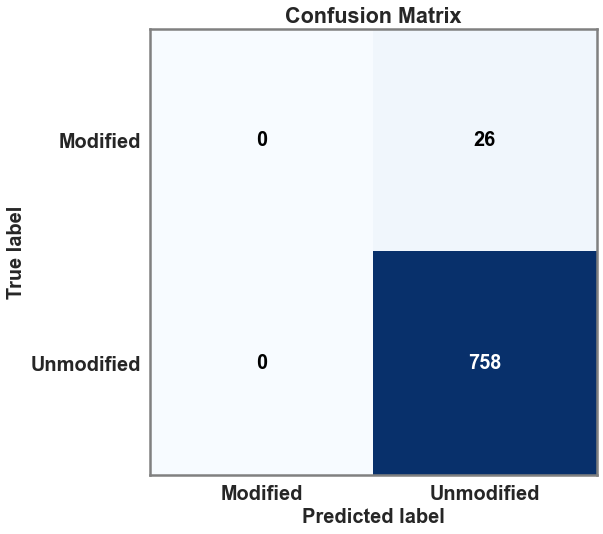

In [20]:
# confusion matrix from scikitplot
ax1=skplt.metrics.plot_confusion_matrix(y_val_combined, y_pred, labels=[1,0], figsize=(10,10), text_fontsize=20)
ax1.set_yticklabels(["Modified","Unmodified"])
ax1.set_xticklabels(["Modified","Unmodified"])
ax1.images[-1].colorbar.remove()

In [21]:
# compute f1 score for modifie positions
f1_score(y_val_combined,y_pred)

0.0

### Modelling with the Dataset

#### Model Selector Class

In [26]:
class ModelSelector():

    # initialize model selector class
    # scoring and models are prewritten, to add models and scoring functions manually add them in the same pattern
    # or uncomment already present ones
    
    def __init__(self, preprocessor=None,cv = 5, instance_name=None):
        self.results = []
        self.name = []
        self.cv = cv
        self.labels = []
        self.scoring = {
                        #'precision':'precision',
                        'recall': 'recall',
                        'f1score':'f1',
                        #'roc auc':'roc_auc'
                        }
        self.models = [
                        ('LR', LogisticRegression(random_state=seed, max_iter = 1000, n_jobs=-1)),
                        #('KNN', KNeighborsClassifier(n_jobs = -1)),
                        ('RF', RandomForestClassifier(random_state=seed, n_jobs = -1)),
                        #('ADAB', AdaBoostClassifier(random_state=seed)),
                        ('XGB',  XGBClassifier(random_state=seed, n_jobs = -1)),
                        #('SVC', SVC(random_state=seed)),
                        ('GNB', GaussianNB()),
                        #('MLP', MLPClassifier(random_state=seed)),
                        ]
        self.instance_name = instance_name
        self.tests = ["test_"+elm for elm in self.scoring.keys()]
        self.best_results= []

    # fit each model and do cv and record cvs and names
    def select_model(self, X, y):
        for name, model in self.models:
            cv_results = cross_validate(model, X, y, cv=self.cv, scoring=self.scoring, n_jobs=-1, return_train_score=True)
            self.results.append(cv_results)
            self.name.append(name)
    # plot the test scores for each test and each model
    def plot_selection(self):
       
        plt.figure(figsize = (15,8))
        plt.suptitle('Algorithm Comparison for ' + self.instance_name)
        for idx, test in enumerate(self.tests):
            temp_results = [self.results[i][test] for i in range(len(self.results))]
            plt.subplot(1,len(self.tests),idx+1)
            sns.boxplot(y = temp_results, x = self.name)
            plt.title(test)
            plt.xticks(rotation = 90)
            plt.ylim(0,1.05)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        
    # get test scores for top 3 tests for each measure and return them as a dataframe
    def get_scores(self, top = 3):
        self.best_results = []
        for idx, test in enumerate(self.tests):
            temp_results = [np.mean(self.results[i][test]) for i in range(len(self.results))]
            test_name = [test for i in range(len(self.name))]
            instance_name = [self.instance_name for i in range (len(self.name))]
            temp_best = sorted(zip(temp_results,self.name,test_name, instance_name), reverse = True)[:top]
            self.best_results.append(temp_best)

        test= pd.DataFrame()
        for i in range(np.array(self.best_results).shape[0]):
            test= pd.concat([test, pd.DataFrame(np.array(self.best_results)[i])], axis=0)
        test.columns = ["test_result","model","test", "instance_name"]
        test.test_result = test.test_result.astype(float)
        test.set_index(["instance_name","test","model"], inplace = True)
        return(test)


#### Model Selection

In [27]:
# first model selection on whole dataset using model selector class (found in utilities.py)
sel_c = ModelSelector(instance_name = "Combined Dataframe", cv = cv)

In [28]:
# cross validate each model and score the for each scoring function
sel_c.select_model(X_finaltest_combined, y_finaltest_combined)

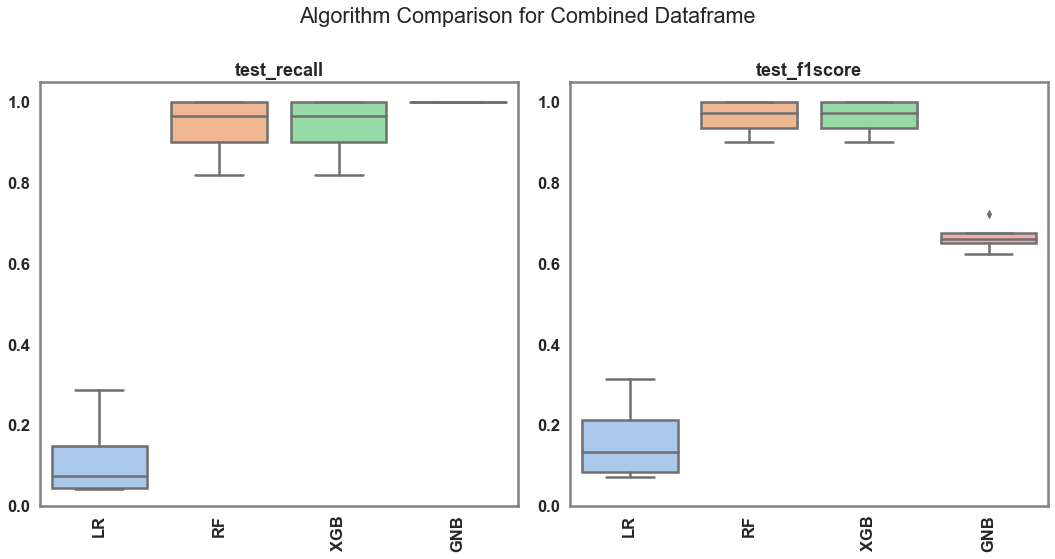

In [29]:
# plot boxplots for all scores containing all models

sel_c.plot_selection()

In [30]:
# output top 3 model scores for each scoring function
sel_c.get_scores()

test_result
instance_name      test         model             
Combined Dataframe test_recall  GNB       1.000000
                                XGB       0.936688
                                RF        0.936688
                   test_f1score XGB       0.961364
                                RF        0.961364
                                GNB       0.665713

#### Evaluation

In [31]:
# intialize xgboost classifier with pre optimized hyperparameters
xgb = XGBClassifier(n_jobs=4,random_state=seed, gamma= 0, learning_rate = 0.3,
                        max_depth= 5, n_estimators = 150)

In [32]:
# fit xgboost classifier to test data and predict from validation data
xgb.fit(X_finaltest_combined, y_finaltest_combined)
y_pred = xgb.predict(X_val_combined)

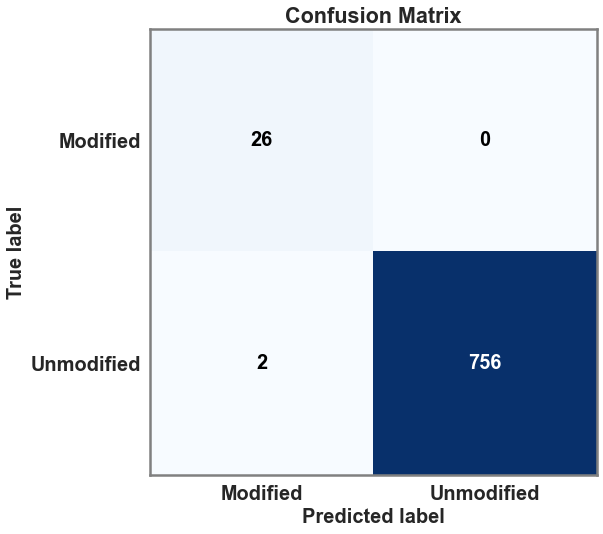

In [33]:
# evaluate model using scikiplots confusion matrix

ax1=skplt.metrics.plot_confusion_matrix(y_val_combined, y_pred, labels=[1,0], figsize=(10,10), text_fontsize=20)
ax1.set_yticklabels(["Modified","Unmodified"])
ax1.set_xticklabels(["Modified","Unmodified"])
ax1.images[-1].colorbar.remove()

In [ ]:
# compute f1 score for test

f1_score(y_val_combined,y_pred)

#### feature importances

In [ ]:
# plot feature importances and label them according to the numeric features used using scikitplot

skplt.estimators.plot_feature_importances(xgb, feature_names=numeric_features_combined,max_num_features=10)
plt.xticks(rotation=90);